# COGS 108 - Final Project 

# Overview

The point of the project was to show if there was a relationship between higher Yelp scores and a lower CES Score within San Diego parks. I split up the data into Downtown and other San Diego parks in order to see if that was a factor as well. In order to test this, I used a dataset from Yelp reviews for San Diego parks and a dataset with health information from the county of San Diego. After finding that there was a general average of higher CES Scores within Downtown San Diego parks and then used a single linear regression model we found that although there is a decrease of Yelp Scores as CES scores increase, it is not a major decrease. As such there is a slight decrease in Yelp scores of San Diego parks as CES scores increase in San Diego parks.

# Name & GitHub ID

- Name: Darius Azure
- GitHub Username: MajorDarius

# Research Question

Are the Yelp scores of parks within downtown San Diego lower than other San Diego Parks? Does a higher Yelp score correlate with a lower CalEnviroScreen score (Pollution multiplied by population of area)?

## Background and Prior Work

Yelp is a resource used by people in order to review various locations like restaurants, business, and locations such as Parks and Recs. It relies on user reviews and they review on a 0 to 5 star scale and a higher score is seen as a more positive review. People when they want to visit someplace like a park, they can look up a location and type in the type of location they want to go to and can read reviews of that specific place. For instance we can look up Parks and Recs for San Diego to get the top 10 suggestions (1). Reviews tend to be representations of experiences that occurred in the location.

Each city is affected by some form of pollution, some more than others. There is also a problem that different cities have different populations. In order to try to ensure there is a proper ratio of pollution to population, there has been a screening of many factors affecting the health of each California county. There are various factors such as population, longitude, latitude, traffic, health of water, ozone layer, etc. (2). From this we can get a score on how much pollution all these factors lead to in each county and each zip code within California. From there we can get a map of all these locations and their level of pollution (3). These scores can be used to define the level of pollution with population in mind.
References (include links):
 
- 1) https://www.yelp.com/search?find_desc=Parks%20and%20Recreation&find_loc=San%20Diego%2C%20CA
- 2) https://oehha.ca.gov/calenviroscreen/about-calenviroscreen
- 3) https://oehha.ca.gov/calenviroscreen/maps-data

# Hypothesis


The Yelp Scores of Downtown San Diego will be higher than parks outside downtown because of more population density. Since there are more people in a smaller area downtown, the lower scores will be outnumbered by higher scores in comparison to outside downtown parks. Even with higher scores, downtown will probably have a higher CalEnviroScreen score due to more pollution that cities tend to have.  

# Dataset(s)

- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv 
- Number of observations: 833

This dataset has the Yelp score for all the parks in San Diego. It contains the Zip code where I split the data into downtown San Diego code which is 92101.

- Dataset Name: calenviroscreen-final-report.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/calenviroscreen-final-report.csv 
- Number of observations: 623

This dataset describes all the enviromental statistics of all parks within San Diego parks. We use the enviromental score of the park to rank the parks by location.

I combined these datasets by connecting their zip codes of the two sets in order to separate the two datasets into downtown and not. These zipcodes are the best way to connect the sets due to them both sharing this information.

# Setup

In [102]:
%matplotlib inline

from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [103]:
yelp_df = pd.read_csv('yelp_SD_parks.csv')
health_df = pd.read_csv('calenviroscreen-final-report.csv')

# Data Cleaning

First I split the dataframes into columns that we will focus on. Then we isolate the zipcode for both the data frames in order to merge them together. In order to ensure we did this, we isolated the health dataframe for only San Diego counties. 

In [104]:
#Set the columns we want to focus on
yelp_df = yelp_df[['name', 'address', 'rating', 'review_count']]
health_df.rename(columns={'CES 2.0 Score':'Score'}, inplace=True)
health_df = health_df[['California County','Location 1','Score']]

#Isolate the zipcode of the yelp dataframe
yelp_df['zipcode'] = yelp_df['address'].astype(str).str[-5:]

#Isolate the San Diego counties from the health dataframe.
health_df = health_df[health_df['California County'] == 'San Diego']

#Drop 4 observations that hold null data that would harm the data.
health_df = health_df.dropna()

#Extract the zip code from the health data frame since all San Diego zip codes start with 9.
def extract_zip(location):
    return location[location.find('9'): location.find('9') + 5]
zip_list = []
for i in health_df.index:
    zip_list.append(extract_zip(health_df.loc[i, 'Location 1']))
health_df['zipcode'] = zip_list
health_df = health_df.drop(columns={'Location 1'})

#Merge the dataframes on the zipcode columns.
merged_df = pd.merge(yelp_df, health_df, on = 'zipcode')
print(merged_df.head())

          name                            address  rating  review_count  \
0  Balboa Park  1549 El Prado San Diego, CA 92101     5.0          2105   
1  Balboa Park  1549 El Prado San Diego, CA 92101     5.0          2105   
2  Balboa Park  1549 El Prado San Diego, CA 92101     5.0          2105   
3  Balboa Park  1549 El Prado San Diego, CA 92101     5.0          2105   
4  Balboa Park  1549 El Prado San Diego, CA 92101     5.0          2105   

  zipcode California County  Score  
0   92101         San Diego  36.17  
1   92101         San Diego  29.02  
2   92101         San Diego  27.58  
3   92101         San Diego  24.24  
4   92101         San Diego  20.19  


# Data Analysis & Results

**Here in order to analysis for downtown vs other San Diego parks, we split the datasets by the zipcode 92101 that represents downtown San Diego.**

In [105]:
#Split the Yelp dataframe into downtown and other then print them.
dt = yelp_df[yelp_df['zipcode'] == '92101']
print(dt.head())
print(dt.shape)
notdt = yelp_df[yelp_df['zipcode']!='92101']
print(notdt.head())
print(notdt.shape)
#Split the merged dataframe into downtown and other then print them.
dt_merged = merged_df[merged_df['zipcode'] == '92101']
notdt_merged = merged_df[merged_df['zipcode'] != '92101']
print(dt_merged.head())
print(dt_merged.shape)

                  name                                    address  rating  \
0          Balboa Park          1549 El Prado San Diego, CA 92101     5.0   
2      Waterfront Park       1600 Pacific Hwy San Diego, CA 92101     4.5   
14        Pioneer Park     1521 Washington Pl San Diego, CA 92101     4.0   
43  Harbor Island Park  1910 Harbor Island Dr San Diego, CA 92101     4.5   
44    Golden Hill Park         Golden Hill Dr San Diego, CA 92101     4.0   

    review_count zipcode  
0           2105   92101  
2            242   92101  
14            55   92101  
43            71   92101  
44            35   92101  
(127, 5)
                name                                       address  rating  \
1        Civita Park          7960 Civita Blvd San Diego, CA 92108     4.5   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116     4.5   
4      Bay View Park                 413 1st St Coronado, CA 92118     5.0   
5       Centrum Park        8578 Lightwave Ave San Die

**After, I take a look at the distribution of scores to find outliers and show how many reviews are shown for that score.**

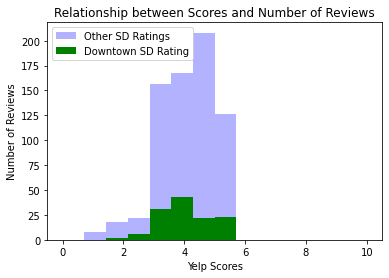

In [106]:
bins = np.linspace(0, 10, 15)
plt.xlabel("Yelp Scores")
plt.ylabel("Number of Reviews")
plt.title('Relationship between Scores and Number of Reviews')
plt.hist(notdt['rating'], bins, alpha=0.3, label='Other SD Ratings', color='blue')
plt.hist(dt['rating'], bins,  alpha=1, label='Downtown SD Rating', color='green')
plt.legend(loc='upper left')
plt.show()

#### *Figure #1 The graph seems to show values between 1-5 and most scores seem to hover around 3-5.*

**Converting the numbers to log values to get a better view at score distribution.**

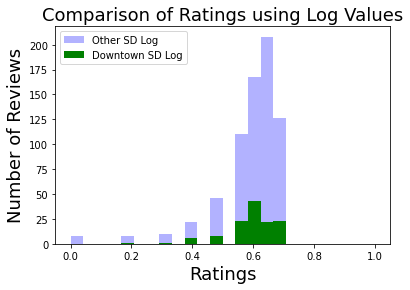

In [107]:
#Make columns that hold log values
dt['rating_log'] = np.log10(dt['rating'])
notdt['rating_log'] = np.log10(notdt['rating'])

#Making histogram with the comparison of values
bins = np.linspace(0, 1, 25)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Number of Reviews", fontsize=18)
plt.title('Comparison of Ratings using Log Values', fontsize=18)
plt.hist(notdt['rating_log'], bins, alpha=0.3, label='Other SD Log', color='blue')
plt.hist(dt['rating_log'], bins,  alpha=1, label='Downtown SD Log', color='green')
plt.legend(loc='upper left')
plt.show()

***Figure #2: The graph seems to show a more normalized mean of data showing most data is around the same for both.***

**Finding the mean of all the scores for both Downtown and other cities to see if there is a major difference.**

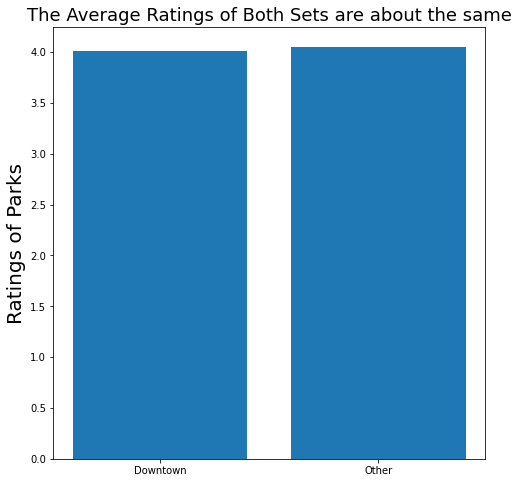

In [108]:
#Storing mean values
dt_rating_mean = dt['rating'].mean()
notdt_rating_mean = notdt['rating'].mean()

#Using a barplot to show both means.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1.5])
x = ['Downtown', 'Other']
y = [dt_rating_mean, notdt_rating_mean]
ax.bar(x,y)
plt.ylabel('Ratings of Parks', fontsize=20)
plt.title('The Average Ratings of Both Sets are about the same', fontsize=18)
plt.show()

**Figure #3: The means for both sets of scores show that they are both about the same except a slight higher average score for other parks outside Downtown**

**Distribution of CES Scores for both datasets to find outliers**

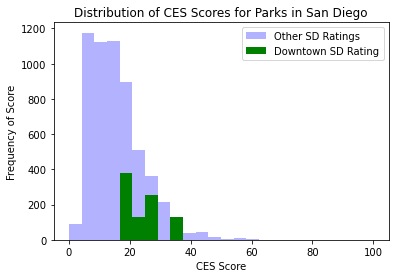

In [109]:
#Making a histogram with frequency of score and actual score of both datasets
bins = np.linspace(0, 100, 25)
plt.xlabel("CES Score")
plt.ylabel("Frequency of Score")
plt.title('Distribution of CES Scores for Parks in San Diego')
plt.hist(notdt_merged['Score'], bins, alpha=0.3, label='Other SD Ratings', color='blue')
plt.hist(dt_merged['Score'], bins,  alpha=1, label='Downtown SD Rating', color='green')
plt.legend(loc='upper right')
plt.show()

***Figure #4: The distribution of the Scores seem normal and don't have outliers that would completely shift data***

**Converting the numbers to log values to get a better view at CES score distribution.**

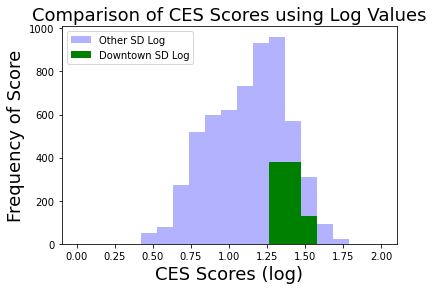

In [110]:
#Make a column with log values
dt_merged['CES_log'] = np.log10(dt_merged['Score'])
notdt_merged['CES_log'] = np.log10(notdt_merged['Score'])

#Make a histogram with the log CES Scores of all parks
bins = np.linspace(0, 2, 20)
plt.xlabel("CES Scores (log)", fontsize=18)
plt.ylabel("Frequency of Score", fontsize=18)
plt.title('Comparison of CES Scores using Log Values', fontsize=18)
plt.hist(notdt_merged['CES_log'], bins, alpha=0.3, label='Other SD Log', color='blue')
plt.hist(dt_merged['CES_log'], bins,  alpha=1, label='Downtown SD Log', color='green')
plt.legend(loc='upper left')
plt.show()

***Figure #5: By converting it to log we can more clearly see that Downtown cities mainly have a high CES Score***

**Plotting the average scores of both datasets in order to see a clear difference**

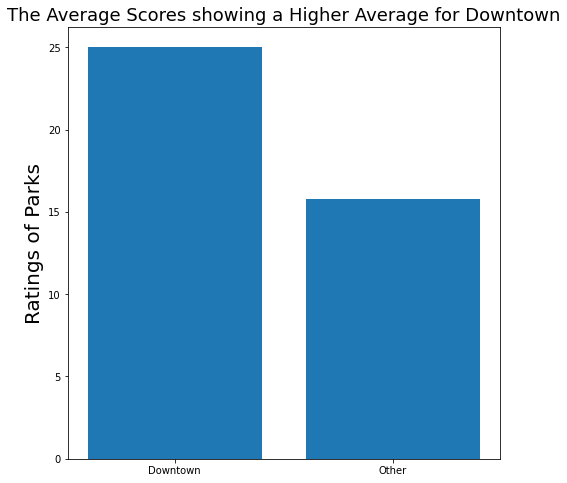

In [111]:
#Store the mean of both downtown and other park's CES score
dt_score_mean = dt_merged['Score'].mean()
notdt_score_mean = notdt_merged['Score'].mean()
#Making a bargraph to show the difference between the average scores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1.5])
x = ['Downtown', 'Other']
y = [dt_score_mean, notdt_score_mean]
ax.bar(x,y)
plt.ylabel('Ratings of Parks', fontsize=20)
plt.title('The Average Scores showing a Higher Average for Downtown', fontsize=18)
plt.show()

***Figure #6: The graph shows a clear difference between the average score of Downtown and other parks, showing that Downtown parks on average have a higher CES score***

Text(0.5, 1.0, 'Relationship between CES Score and Yelp Rating')

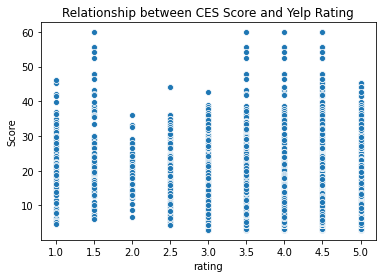

In [112]:
#Making a scatterplot showing the relation of Yelp rating and CES scores.
ax = sns.scatterplot(x='rating', y='Score', data=merged_df)
ax.set_title('Relationship between CES Score and Yelp Rating')

***Figure #7: There appears to be a normal distrubtion with a few outliers but the data appears to be normal***

**To get a better understanding of the relationship between the scores and rating, I use a single linear regression model.**

In [113]:
#Prediciting ratings from CES Score
outcome, predictors = patsy.dmatrices('rating ~ Score', merged_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.48e-27
Time:                        17:56:48   Log-Likelihood:                -8061.3
No. Observations:                6646   AIC:                         1.613e+04
Df Residuals:                    6644   BIC:                         1.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2404      0.021    200.133      0.0

From this data, there does not appear to be a clear statistical data, the intercept which is the Yelp ratings is 4.2404 which is between the 0-5 rating so that data seems to be logical. From there we can see that for every point of CES score, the Yelp Rating decreases at a rate of -0.012. This agrees with my hypothesis as I stated that an increase in CES score results in a lower Yelp Rating.

If I have an alpha value of 0.05 then it is lower than the value so there appears to not be that impactful but there is a small trend

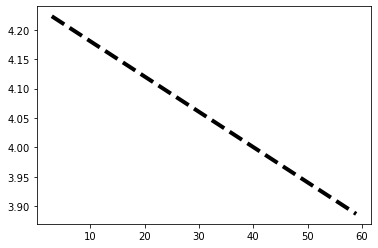

In [114]:
#Printing a lineplot showing the relationship between the Yelp Score going down as CES Score increases
xs = np.arange(merged_df['Score'].min(), merged_df['Score'].max())
ys = -0.006 * xs + 4.2404
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

***Figure #8: The figure shows a linear decrease of Yelp Score once CES Scores increase but also a small change.***

In [115]:
#Prediciting ratings from CES Score factoring in the number of reviews
outcome2, predictors2 = patsy.dmatrices('rating ~ Score + review_count', merged_df)
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.48e-27
Time:                        17:56:49   Log-Likelihood:                -8061.3
No. Observations:                6646   AIC:                         1.613e+04
Df Residuals:                    6644   BIC:                         1.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2404      0.021    200.133      0.0

If we factor in the review_count then we can see there is not much of a change. We can thus just stick to a single linear regression.

# Ethics & Privacy

I had been provided these datasets and they are public sets that can be found on the San Diego Government website. In order to ensure the privacy of such data, I removed all the personal data that could be possibly tracked back to an individual. Any personal information from the Yelp reviews was removed in favor of the rating and the park in order to ensure the analysis would only be for the data of the ratings and not focus on an individual. The health information removed all information besides the location of the park, the county and the percentage. 

The bigger concern about the data is the bias within it. The greater picture is that the data is only looking at one county within one state which can have a bias within it. Even on the small scale there is a problem that downtown San Diego has a higher population density and it is just one city so it should not be used on a greater scale to describe higher Yelp scores leading to lower environment scores. There is also the bias that not everyone goes onto Yelp and most people feel strongly about a place if going out of their way to leave a score compared to more of an analysis like the health data. So while I avoided some bias by testing out all parks within San Diego county, there will still be bias within that sample that may not apply to other counties even inside California. I am aware of potential bias and know this can skew the results. 

# Conclusion & Discussion

The point of the project was to see if there was a relationship between Yelp scores and CES Scores within San Diego parks. In order to do this I cleaned up the datasets by first isolation that I only wanted San Diego County within the health dataset. After that I had separated the data into downtown and other cities by isolating whenever a review and health report had the zip code of 92101 or not. I then merged the datasets based on the zip code in order to try to get a relationship between the two done later on. After that I tested out if there were any outliers within the Yelp Scores and after finding they were normal and about similar which went against my hypothesis, I then tested out the CES Scores. After doing this, I found that the data was normal and then found that Downtown San Diego parks tended to have a higher CES Score. Keeping this in mind, I used a scatterplot and did not notice an unusual trend but noted some possible outliers. I then performed a single linear regression to test the relationship between the two and found a trend that as CES Scores increased, the Yelp Scores slightly decreased which agreed with my hypothesis. I then tried to see if the number of reviews would affect the data and found that the second linear regression did not have an impact at all. 

There were some limitations to my analysis as not all of San Diego is represented by Yelp reviews and I know the number of Downtown CES Scores were limited so they were not able to show a huge trend. I feel like since the data was provided, I did not get a complete grasp on it and there was a lot of health information that had to be overlooked that could have provided some context meaning I might have lost some key information.

The results of this project can show a push to try to limit pollution within cities. The data can suggest that the cleaner the city, the better Yelp reviews people will leave, at least in San Diego cities. We can suggest the changes to help limit pollution, especially within Downtown San Diego.
